<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Final_Res__RF_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [16]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [18]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [20]:

set(list(dataset[target]))

{0, 1}

In [21]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [23]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
new_dataset=balance(X_train,y_train)

X_train = new_dataset.loc[:, new_dataset.columns!=target]
y_train = new_dataset[target]

  1%|          | 1/150 [00:01<02:33,  1.03s/it]

1/150 round completed......................... Accurecy: 0.8427048260381593


  1%|▏         | 2/150 [00:03<04:02,  1.64s/it]

2/150 round completed......................... Accurecy: 0.8793490460157127


  2%|▏         | 3/150 [00:06<05:36,  2.29s/it]

3/150 round completed......................... Accurecy: 0.8800224466891133


  3%|▎         | 4/150 [00:10<07:13,  2.97s/it]

4/150 round completed......................... Accurecy: 0.8973625140291807


  3%|▎         | 5/150 [00:15<08:56,  3.70s/it]

5/150 round completed......................... Accurecy: 0.8969135802469136


  4%|▍         | 6/150 [00:21<10:47,  4.49s/it]

6/150 round completed......................... Accurecy: 0.9049382716049382


  5%|▍         | 7/150 [00:28<12:39,  5.31s/it]

7/150 round completed......................... Accurecy: 0.9038159371492704


  5%|▌         | 8/150 [00:36<14:34,  6.16s/it]

8/150 round completed......................... Accurecy: 0.9112233445566779


  6%|▌         | 9/150 [00:45<16:29,  7.01s/it]

9/150 round completed......................... Accurecy: 0.9079685746352413


  7%|▋         | 10/150 [00:54<18:27,  7.91s/it]

10/150 round completed......................... Accurecy: 0.9138608305274972


  7%|▋         | 11/150 [01:05<20:25,  8.82s/it]

11/150 round completed......................... Accurecy: 0.9108305274971942


  8%|▊         | 12/150 [01:18<22:47,  9.91s/it]

12/150 round completed......................... Accurecy: 0.9155443322109988


  9%|▊         | 13/150 [01:31<24:46, 10.85s/it]

13/150 round completed......................... Accurecy: 0.913973063973064


  9%|▉         | 14/150 [01:45<26:44, 11.80s/it]

14/150 round completed......................... Accurecy: 0.9187991021324354


 10%|█         | 15/150 [02:00<28:42, 12.76s/it]

15/150 round completed......................... Accurecy: 0.9162738496071829


 11%|█         | 16/150 [02:16<30:36, 13.71s/it]

16/150 round completed......................... Accurecy: 0.9196408529741863


 11%|█▏        | 17/150 [02:33<32:33, 14.69s/it]

17/150 round completed......................... Accurecy: 0.9170594837261504


 12%|█▏        | 18/150 [02:51<34:27, 15.66s/it]

18/150 round completed......................... Accurecy: 0.9199214365881032


 13%|█▎        | 19/150 [03:09<36:17, 16.62s/it]

19/150 round completed......................... Accurecy: 0.9179573512906847


 13%|█▎        | 20/150 [03:29<38:06, 17.59s/it]

20/150 round completed......................... Accurecy: 0.9200897867564535


 14%|█▍        | 21/150 [03:51<40:14, 18.72s/it]

21/150 round completed......................... Accurecy: 0.9180695847362514


 15%|█▍        | 22/150 [04:12<41:57, 19.67s/it]

22/150 round completed......................... Accurecy: 0.9211560044893379


 15%|█▌        | 23/150 [04:35<43:41, 20.64s/it]

23/150 round completed......................... Accurecy: 0.9194163860830528


 16%|█▌        | 24/150 [04:59<45:24, 21.62s/it]

24/150 round completed......................... Accurecy: 0.9222222222222223


 17%|█▋        | 25/150 [05:24<47:04, 22.60s/it]

25/150 round completed......................... Accurecy: 0.920314253647587


 17%|█▋        | 26/150 [05:50<48:43, 23.58s/it]

26/150 round completed......................... Accurecy: 0.9221661054994388


 18%|█▊        | 27/150 [06:17<50:21, 24.56s/it]

27/150 round completed......................... Accurecy: 0.9205387205387205


 19%|█▊        | 28/150 [06:45<52:14, 25.69s/it]

28/150 round completed......................... Accurecy: 0.923063973063973


 19%|█▉        | 29/150 [07:14<53:46, 26.66s/it]

29/150 round completed......................... Accurecy: 0.922053872053872


 20%|██        | 30/150 [07:44<55:08, 27.57s/it]

30/150 round completed......................... Accurecy: 0.9246913580246914


 21%|██        | 31/150 [08:15<56:33, 28.52s/it]

31/150 round completed......................... Accurecy: 0.9227272727272727


 21%|██▏       | 32/150 [08:48<58:47, 29.89s/it]

32/150 round completed......................... Accurecy: 0.9255331088664422


 22%|██▏       | 33/150 [09:21<1:00:21, 30.96s/it]

33/150 round completed......................... Accurecy: 0.9235690235690236


 23%|██▎       | 34/150 [09:55<1:01:37, 31.88s/it]

34/150 round completed......................... Accurecy: 0.9249719416386083


 23%|██▎       | 35/150 [10:30<1:02:44, 32.74s/it]

35/150 round completed......................... Accurecy: 0.9237934904601571


 24%|██▍       | 36/150 [11:06<1:04:03, 33.71s/it]

36/150 round completed......................... Accurecy: 0.9249719416386083


 25%|██▍       | 37/150 [11:43<1:05:34, 34.82s/it]

37/150 round completed......................... Accurecy: 0.923625140291807


 25%|██▌       | 38/150 [12:21<1:06:49, 35.80s/it]

38/150 round completed......................... Accurecy: 0.9255331088664422


 26%|██▌       | 39/150 [13:00<1:07:55, 36.72s/it]

39/150 round completed......................... Accurecy: 0.924074074074074


 27%|██▋       | 40/150 [13:40<1:08:56, 37.60s/it]

40/150 round completed......................... Accurecy: 0.9252525252525252


 27%|██▋       | 41/150 [14:21<1:10:21, 38.73s/it]

41/150 round completed......................... Accurecy: 0.9241301907968574


 28%|██▊       | 42/150 [15:03<1:11:26, 39.69s/it]

42/150 round completed......................... Accurecy: 0.9253086419753086


 29%|██▊       | 43/150 [15:46<1:12:30, 40.66s/it]

43/150 round completed......................... Accurecy: 0.9237934904601571


 29%|██▉       | 44/150 [16:30<1:13:33, 41.63s/it]

44/150 round completed......................... Accurecy: 0.9251402918069584


 30%|███       | 45/150 [17:15<1:14:45, 42.71s/it]

45/150 round completed......................... Accurecy: 0.9239618406285073


 31%|███       | 46/150 [18:01<1:15:46, 43.72s/it]

46/150 round completed......................... Accurecy: 0.9241301907968574


 31%|███▏      | 47/150 [18:48<1:16:44, 44.70s/it]

47/150 round completed......................... Accurecy: 0.9235129068462402


 32%|███▏      | 48/150 [19:37<1:17:54, 45.83s/it]

48/150 round completed......................... Accurecy: 0.9248597081930415


 33%|███▎      | 49/150 [20:26<1:18:44, 46.78s/it]

49/150 round completed......................... Accurecy: 0.9241301907968574


 33%|███▎      | 50/150 [21:16<1:19:30, 47.70s/it]

50/150 round completed......................... Accurecy: 0.9255892255892256


 34%|███▍      | 51/150 [22:07<1:20:29, 48.78s/it]

51/150 round completed......................... Accurecy: 0.9239057239057239


 35%|███▍      | 52/150 [22:59<1:21:17, 49.77s/it]

52/150 round completed......................... Accurecy: 0.9254208754208754


 35%|███▌      | 53/150 [23:52<1:22:01, 50.74s/it]

53/150 round completed......................... Accurecy: 0.924074074074074


 36%|███▌      | 54/150 [24:46<1:23:00, 51.88s/it]

54/150 round completed......................... Accurecy: 0.9247474747474748


 37%|███▋      | 55/150 [25:41<1:23:35, 52.80s/it]

55/150 round completed......................... Accurecy: 0.9235129068462402


 37%|███▋      | 56/150 [26:37<1:24:07, 53.70s/it]

56/150 round completed......................... Accurecy: 0.9250841750841751


 38%|███▊      | 57/150 [27:35<1:24:53, 54.77s/it]

57/150 round completed......................... Accurecy: 0.9240179573512907


 39%|███▊      | 58/150 [28:32<1:25:26, 55.72s/it]

58/150 round completed......................... Accurecy: 0.9248035914702581


 39%|███▉      | 59/150 [29:31<1:25:57, 56.68s/it]

59/150 round completed......................... Accurecy: 0.9239618406285073


 40%|████      | 60/150 [30:32<1:26:38, 57.76s/it]

60/150 round completed......................... Accurecy: 0.9251964085297418


 41%|████      | 61/150 [31:32<1:27:00, 58.65s/it]

61/150 round completed......................... Accurecy: 0.9238496071829405


 41%|████▏     | 62/150 [32:34<1:27:30, 59.67s/it]

62/150 round completed......................... Accurecy: 0.9254769921436589


 42%|████▏     | 63/150 [33:37<1:27:53, 60.62s/it]

63/150 round completed......................... Accurecy: 0.9245230078563412


 43%|████▎     | 64/150 [34:41<1:28:19, 61.62s/it]

64/150 round completed......................... Accurecy: 0.925364758698092


 43%|████▎     | 65/150 [35:46<1:28:37, 62.55s/it]

65/150 round completed......................... Accurecy: 0.924354657687991


 44%|████▍     | 66/150 [36:52<1:28:57, 63.54s/it]

66/150 round completed......................... Accurecy: 0.9258136924803592


 45%|████▍     | 67/150 [37:59<1:29:28, 64.68s/it]

67/150 round completed......................... Accurecy: 0.9242985409652076


 45%|████▌     | 68/150 [39:07<1:29:50, 65.74s/it]

68/150 round completed......................... Accurecy: 0.9257014590347924


 46%|████▌     | 69/150 [40:17<1:30:09, 66.79s/it]

69/150 round completed......................... Accurecy: 0.9241301907968574


 47%|████▋     | 70/150 [41:27<1:30:20, 67.76s/it]

70/150 round completed......................... Accurecy: 0.9253086419753086


 47%|████▋     | 71/150 [42:38<1:30:44, 68.91s/it]

71/150 round completed......................... Accurecy: 0.9242424242424242


 48%|████▊     | 72/150 [43:50<1:30:50, 69.88s/it]

72/150 round completed......................... Accurecy: 0.925364758698092


 49%|████▊     | 73/150 [45:04<1:31:02, 70.94s/it]

73/150 round completed......................... Accurecy: 0.9246913580246914


 49%|████▉     | 74/150 [46:18<1:31:03, 71.89s/it]

74/150 round completed......................... Accurecy: 0.9252525252525252


 50%|█████     | 75/150 [47:33<1:31:14, 73.00s/it]

75/150 round completed......................... Accurecy: 0.924635241301908


 51%|█████     | 76/150 [48:50<1:31:14, 73.98s/it]

76/150 round completed......................... Accurecy: 0.9250841750841751


 51%|█████▏    | 77/150 [50:07<1:31:19, 75.06s/it]

77/150 round completed......................... Accurecy: 0.9249158249158249


 52%|█████▏    | 78/150 [51:26<1:31:13, 76.02s/it]

78/150 round completed......................... Accurecy: 0.9252525252525252


 53%|█████▎    | 79/150 [52:45<1:31:18, 77.16s/it]

79/150 round completed......................... Accurecy: 0.9250280583613917


 53%|█████▎    | 80/150 [54:06<1:31:03, 78.06s/it]

80/150 round completed......................... Accurecy: 0.925364758698092


 54%|█████▍    | 81/150 [55:27<1:30:52, 79.02s/it]

81/150 round completed......................... Accurecy: 0.9249719416386083


 55%|█████▍    | 82/150 [56:49<1:30:41, 80.03s/it]

82/150 round completed......................... Accurecy: 0.9255331088664422


 55%|█████▌    | 83/150 [58:12<1:30:11, 80.78s/it]

83/150 round completed......................... Accurecy: 0.9255892255892256


 56%|█████▌    | 84/150 [59:36<1:30:02, 81.86s/it]

84/150 round completed......................... Accurecy: 0.9258136924803592


 57%|█████▋    | 85/150 [1:01:01<1:29:44, 82.83s/it]

85/150 round completed......................... Accurecy: 0.9248597081930415


 57%|█████▋    | 86/150 [1:02:28<1:29:30, 83.91s/it]

86/150 round completed......................... Accurecy: 0.9257014590347924


 58%|█████▊    | 87/150 [1:03:55<1:29:09, 84.91s/it]

87/150 round completed......................... Accurecy: 0.9254769921436589


 59%|█████▊    | 88/150 [1:05:23<1:28:52, 86.02s/it]

88/150 round completed......................... Accurecy: 0.925645342312009


 59%|█████▉    | 89/150 [1:06:53<1:28:33, 87.10s/it]

89/150 round completed......................... Accurecy: 0.9250841750841751


 60%|██████    | 90/150 [1:08:23<1:28:02, 88.04s/it]

90/150 round completed......................... Accurecy: 0.9254769921436589


 61%|██████    | 91/150 [1:09:56<1:27:49, 89.31s/it]

91/150 round completed......................... Accurecy: 0.9253086419753086


 61%|██████▏   | 92/150 [1:11:29<1:27:26, 90.46s/it]

92/150 round completed......................... Accurecy: 0.9260381593714927


 62%|██████▏   | 93/150 [1:13:02<1:26:42, 91.28s/it]

93/150 round completed......................... Accurecy: 0.9259820426487093


 63%|██████▎   | 94/150 [1:14:37<1:26:14, 92.40s/it]

94/150 round completed......................... Accurecy: 0.9259820426487093


 63%|██████▎   | 95/150 [1:16:13<1:25:43, 93.51s/it]

95/150 round completed......................... Accurecy: 0.9258698092031425


 64%|██████▍   | 96/150 [1:17:49<1:24:52, 94.30s/it]

96/150 round completed......................... Accurecy: 0.9262065095398428


 65%|██████▍   | 97/150 [1:19:27<1:24:18, 95.43s/it]

97/150 round completed......................... Accurecy: 0.9259259259259259


 65%|██████▌   | 98/150 [1:21:06<1:23:37, 96.49s/it]

98/150 round completed......................... Accurecy: 0.9260942760942761


 66%|██████▌   | 99/150 [1:22:46<1:22:44, 97.34s/it]

99/150 round completed......................... Accurecy: 0.9255892255892256


 67%|██████▋   | 100/150 [1:24:27<1:22:02, 98.45s/it]

100/150 round completed......................... Accurecy: 0.9259820426487093


 67%|██████▋   | 101/150 [1:26:09<1:21:17, 99.54s/it]

101/150 round completed......................... Accurecy: 0.9255892255892256


 68%|██████▊   | 102/150 [1:27:51<1:20:22, 100.47s/it]

102/150 round completed......................... Accurecy: 0.9259820426487093


 69%|██████▊   | 103/150 [1:29:35<1:19:26, 101.42s/it]

103/150 round completed......................... Accurecy: 0.9258136924803592


 69%|██████▉   | 104/150 [1:31:20<1:18:35, 102.52s/it]

104/150 round completed......................... Accurecy: 0.9260942760942761


 70%|███████   | 105/150 [1:33:06<1:17:42, 103.60s/it]

105/150 round completed......................... Accurecy: 0.9262626262626262


 71%|███████   | 106/150 [1:34:53<1:16:39, 104.52s/it]

106/150 round completed......................... Accurecy: 0.926374859708193


 71%|███████▏  | 107/150 [1:36:41<1:15:38, 105.55s/it]

107/150 round completed......................... Accurecy: 0.9257575757575758


 72%|███████▏  | 108/150 [1:38:30<1:14:37, 106.61s/it]

108/150 round completed......................... Accurecy: 0.9260942760942761


 73%|███████▎  | 109/150 [1:40:20<1:13:35, 107.69s/it]

109/150 round completed......................... Accurecy: 0.925645342312009


 73%|███████▎  | 110/150 [1:42:11<1:12:26, 108.66s/it]

110/150 round completed......................... Accurecy: 0.9262626262626262


 74%|███████▍  | 111/150 [1:44:03<1:11:13, 109.58s/it]

111/150 round completed......................... Accurecy: 0.9259259259259259


 75%|███████▍  | 112/150 [1:45:56<1:10:02, 110.60s/it]

112/150 round completed......................... Accurecy: 0.9264870931537598


 75%|███████▌  | 113/150 [1:47:50<1:08:53, 111.72s/it]

113/150 round completed......................... Accurecy: 0.9261503928170595


 76%|███████▌  | 114/150 [1:49:45<1:07:40, 112.79s/it]

114/150 round completed......................... Accurecy: 0.9263187429854096


 77%|███████▋  | 115/150 [1:51:41<1:06:22, 113.80s/it]

115/150 round completed......................... Accurecy: 0.9255331088664422


 77%|███████▋  | 116/150 [1:53:38<1:04:59, 114.68s/it]

116/150 round completed......................... Accurecy: 0.926374859708193


 78%|███████▊  | 117/150 [1:55:36<1:03:33, 115.57s/it]

117/150 round completed......................... Accurecy: 0.9258136924803592


 79%|███████▊  | 118/150 [1:57:35<1:02:14, 116.70s/it]

118/150 round completed......................... Accurecy: 0.9264309764309764


 79%|███████▉  | 119/150 [1:59:35<1:00:49, 117.73s/it]

119/150 round completed......................... Accurecy: 0.9258136924803592


 80%|████████  | 120/150 [2:01:37<59:23, 118.78s/it]  

120/150 round completed......................... Accurecy: 0.9261503928170595


 81%|████████  | 121/150 [2:03:39<57:54, 119.80s/it]

121/150 round completed......................... Accurecy: 0.9260942760942761


 81%|████████▏ | 122/150 [2:05:42<56:21, 120.77s/it]

122/150 round completed......................... Accurecy: 0.9262626262626262


 82%|████████▏ | 123/150 [2:07:46<54:47, 121.74s/it]

123/150 round completed......................... Accurecy: 0.9260381593714927


 83%|████████▎ | 124/150 [2:09:50<53:07, 122.59s/it]

124/150 round completed......................... Accurecy: 0.9264870931537598


 83%|████████▎ | 125/150 [2:11:56<51:26, 123.45s/it]

125/150 round completed......................... Accurecy: 0.9262065095398428


 84%|████████▍ | 126/150 [2:14:03<49:50, 124.60s/it]

126/150 round completed......................... Accurecy: 0.92665544332211


 85%|████████▍ | 127/150 [2:16:11<48:09, 125.65s/it]

127/150 round completed......................... Accurecy: 0.9264309764309764


 85%|████████▌ | 128/150 [2:18:21<46:29, 126.81s/it]

128/150 round completed......................... Accurecy: 0.9267676767676768


 86%|████████▌ | 129/150 [2:20:32<44:48, 128.03s/it]

129/150 round completed......................... Accurecy: 0.9264309764309764


 87%|████████▋ | 130/150 [2:22:43<43:02, 129.10s/it]

130/150 round completed......................... Accurecy: 0.9264309764309764


 87%|████████▋ | 131/150 [2:24:55<41:10, 130.00s/it]

131/150 round completed......................... Accurecy: 0.9263187429854096


 88%|████████▊ | 132/150 [2:27:09<39:20, 131.14s/it]

132/150 round completed......................... Accurecy: 0.9262065095398428


 89%|████████▊ | 133/150 [2:29:24<37:28, 132.25s/it]

133/150 round completed......................... Accurecy: 0.9261503928170595


 89%|████████▉ | 134/150 [2:31:39<35:28, 133.02s/it]

134/150 round completed......................... Accurecy: 0.9258136924803592


 90%|█████████ | 135/150 [2:33:55<33:29, 133.99s/it]

135/150 round completed......................... Accurecy: 0.9257014590347924


 91%|█████████ | 136/150 [2:36:12<31:28, 134.93s/it]

136/150 round completed......................... Accurecy: 0.9257014590347924


 91%|█████████▏| 137/150 [2:38:30<29:23, 135.67s/it]

137/150 round completed......................... Accurecy: 0.9258136924803592


 92%|█████████▏| 138/150 [2:40:49<27:21, 136.75s/it]

138/150 round completed......................... Accurecy: 0.9258698092031425


 93%|█████████▎| 139/150 [2:43:09<25:16, 137.86s/it]

139/150 round completed......................... Accurecy: 0.9255892255892256


 93%|█████████▎| 140/150 [2:45:31<23:10, 139.03s/it]

140/150 round completed......................... Accurecy: 0.925645342312009


 94%|█████████▍| 141/150 [2:47:53<20:59, 139.96s/it]

141/150 round completed......................... Accurecy: 0.925645342312009


 95%|█████████▍| 142/150 [2:50:17<18:48, 141.05s/it]

142/150 round completed......................... Accurecy: 0.9255892255892256


 95%|█████████▌| 143/150 [2:52:41<16:34, 142.02s/it]

143/150 round completed......................... Accurecy: 0.9259259259259259


 96%|█████████▌| 144/150 [2:55:06<14:18, 143.03s/it]

144/150 round completed......................... Accurecy: 0.9259820426487093


 97%|█████████▋| 145/150 [2:57:32<11:59, 143.84s/it]

145/150 round completed......................... Accurecy: 0.9257575757575758


 97%|█████████▋| 146/150 [3:00:00<09:40, 145.00s/it]

146/150 round completed......................... Accurecy: 0.9259820426487093


 98%|█████████▊| 147/150 [3:02:28<07:17, 145.99s/it]

147/150 round completed......................... Accurecy: 0.9255892255892256


 99%|█████████▊| 148/150 [3:04:57<04:53, 146.96s/it]

148/150 round completed......................... Accurecy: 0.9255331088664422


 99%|█████████▉| 149/150 [3:07:28<02:27, 147.94s/it]

149/150 round completed......................... Accurecy: 0.925645342312009


100%|██████████| 150/150 [3:09:58<00:00, 75.99s/it] 

150/150 round completed......................... Accurecy: 0.9255331088664422
The best n_estimators:
128


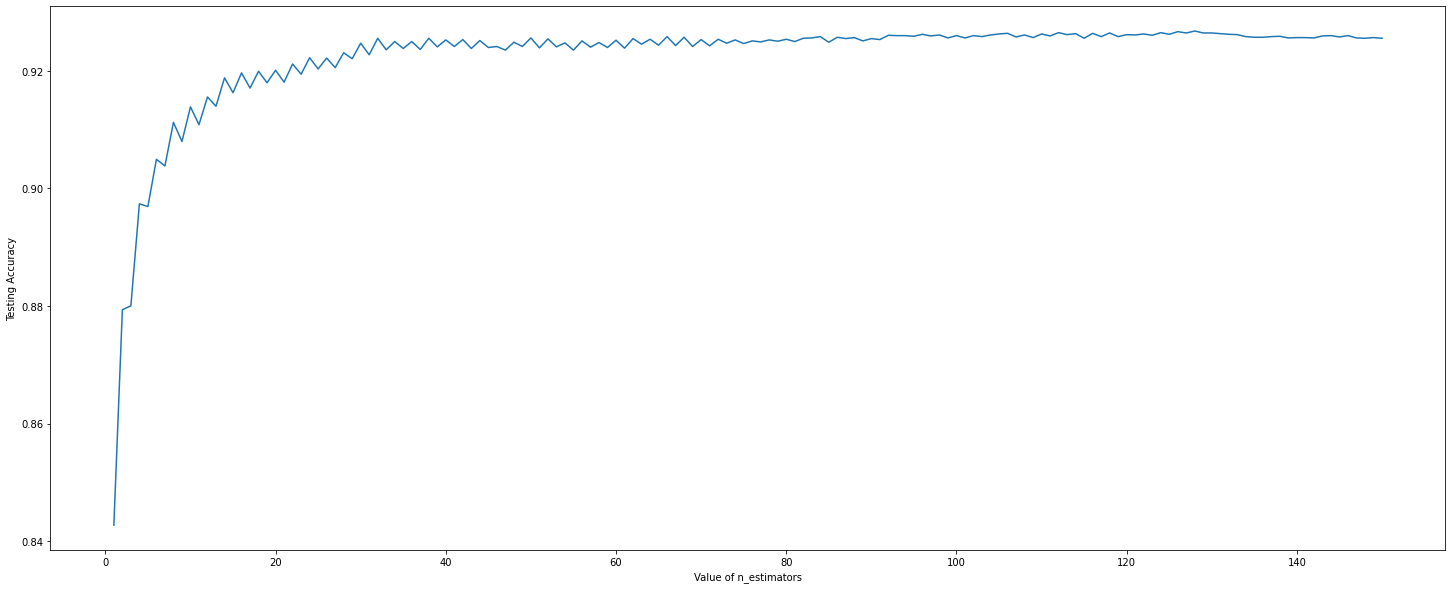

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  4%|▍         | 1/23 [00:35<13:10, 35.92s/it]

28/50 round completed......................... Accurecy: 0.8634854771784233


  9%|▊         | 2/23 [01:11<12:34, 35.94s/it]

29/50 round completed......................... Accurecy: 0.8625518672199171


 13%|█▎        | 3/23 [01:47<11:59, 35.96s/it]

30/50 round completed......................... Accurecy: 0.862240663900415


 17%|█▋        | 4/23 [02:24<11:26, 36.12s/it]

31/50 round completed......................... Accurecy: 0.8616528354080222


 22%|██▏       | 5/23 [03:00<10:49, 36.07s/it]

32/50 round completed......................... Accurecy: 0.8624827109266944


 26%|██▌       | 6/23 [03:36<10:12, 36.04s/it]

33/50 round completed......................... Accurecy: 0.8619640387275243


 30%|███       | 7/23 [04:12<09:36, 36.04s/it]

34/50 round completed......................... Accurecy: 0.8627939142461964


 35%|███▍      | 8/23 [04:48<09:01, 36.12s/it]

35/50 round completed......................... Accurecy: 0.8621715076071923


 39%|███▉      | 9/23 [05:24<08:25, 36.07s/it]

36/50 round completed......................... Accurecy: 0.8629322268326418


 43%|████▎     | 10/23 [06:00<07:48, 36.07s/it]

37/50 round completed......................... Accurecy: 0.862136929460581


 48%|████▊     | 11/23 [06:36<07:12, 36.04s/it]

38/50 round completed......................... Accurecy: 0.8617565698478562


 52%|█████▏    | 12/23 [07:12<06:37, 36.16s/it]

39/50 round completed......................... Accurecy: 0.8621023513139696


 57%|█████▋    | 13/23 [07:48<06:00, 36.09s/it]

40/50 round completed......................... Accurecy: 0.862448132780083


 61%|██████    | 14/23 [08:24<05:24, 36.05s/it]

41/50 round completed......................... Accurecy: 0.862448132780083


 65%|██████▌   | 15/23 [09:00<04:48, 36.03s/it]

42/50 round completed......................... Accurecy: 0.862448132780083


 70%|██████▉   | 16/23 [09:36<04:11, 35.99s/it]

43/50 round completed......................... Accurecy: 0.862448132780083


 74%|███████▍  | 17/23 [10:13<03:36, 36.09s/it]

44/50 round completed......................... Accurecy: 0.862448132780083


 78%|███████▊  | 18/23 [10:48<03:00, 36.05s/it]

45/50 round completed......................... Accurecy: 0.862448132780083


 83%|████████▎ | 19/23 [11:24<02:24, 36.00s/it]

46/50 round completed......................... Accurecy: 0.862448132780083


 87%|████████▋ | 20/23 [12:00<01:47, 35.98s/it]

47/50 round completed......................... Accurecy: 0.862448132780083


 91%|█████████▏| 21/23 [12:37<01:12, 36.07s/it]

48/50 round completed......................... Accurecy: 0.862448132780083


 96%|█████████▌| 22/23 [13:13<00:36, 36.04s/it]

49/50 round completed......................... Accurecy: 0.862448132780083


100%|██████████| 23/23 [13:48<00:00, 36.04s/it]

50/50 round completed......................... Accurecy: 0.862448132780083
The best Depth:
28


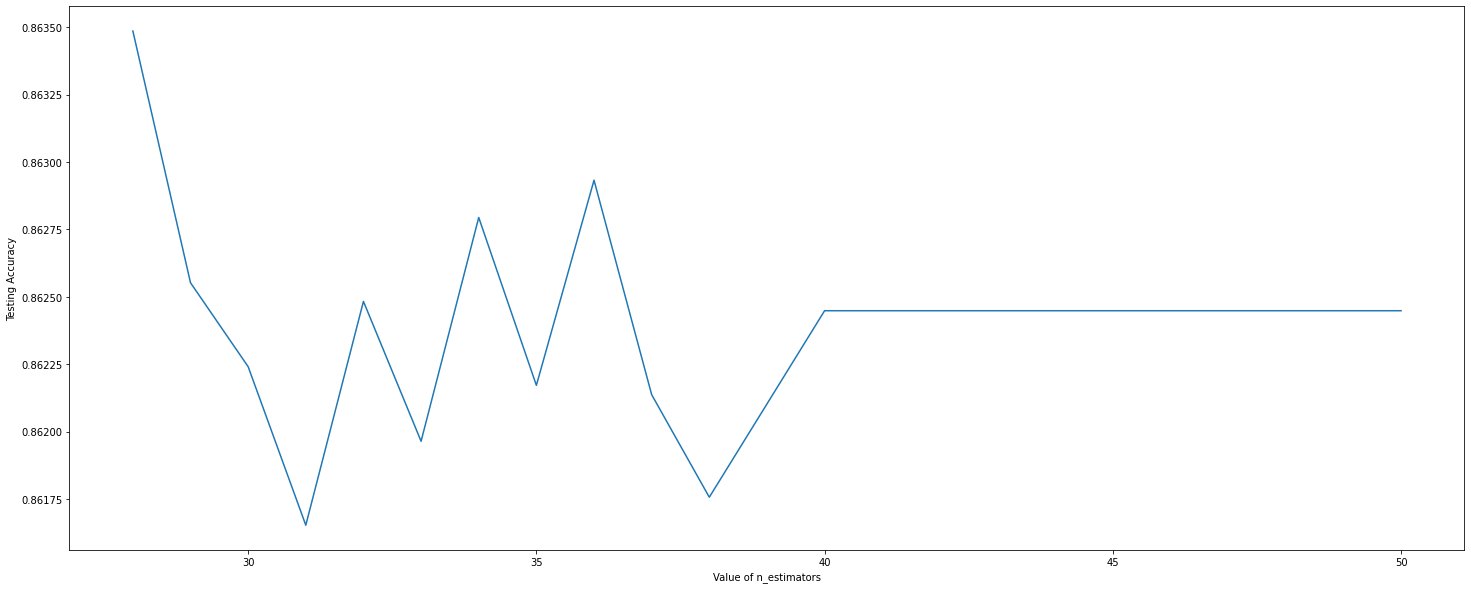

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=50
k_range = range (28,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14132   328]
 [ 3575 10885]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.87     28920
   macro avg       0.88      0.87      0.86     28920
weighted avg       0.88      0.87      0.86     28920

Accurecy:  0.8650414937759336


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14150   310]
 [ 3638 10822]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.86     28920
   macro avg       0.88      0.86      0.86     28920
weighted avg       0.88      0.86      0.86     28920

Accurecy:  0.8634854771784233


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14134   326]
 [ 3559 10901]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.87     28920
   macro avg       0.88      0.87      0.86     28920
weighted avg       0.88      0.87      0.86     28920

Accurecy:  0.8656639004149378
